## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.





### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [32]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [33]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [34]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [35]:
crosstab.columns

Index([False, True], dtype='object', name='isBestSeller')

In [36]:
#1. **Crosstab Analysis**:
    #Create a crosstab between the product `category` and the `isBestSeller` status.

crosstab = pd.crosstab(df['category'], df['isBestSeller']) 
cross_prop = crosstab.copy() #creating a copy of the crosstab so as to not reference the df directly
print(crosstab)
    #Are there categories where being a best-seller is more prevalent? 
    # Groceries, Smart home security and lighting, health and personal care, mobile phone accessories
    	#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based 
        # on this proportion in descending order.*


cross_prop['proportion_best_seller'] = cross_prop[True]/(cross_prop[True] + cross_prop[False])

cross_prop = cross_prop.sort_values(by='proportion_best_seller', ascending=False)

cross_prop



isBestSeller                    False  True
category                                   
3D Printers                       247     1
3D Printing & Scanning           4065     2
Abrasive & Finishing Products     245     5
Action Cameras                   1696     1
Adapters                          251     3
...                               ...   ...
Wind Instruments                  243     7
Window Treatments                 234     5
Women                           17559   213
Women's Sports & Outdoor Shoes   1939    20
eBook Readers & Accessories       246     0

[296 rows x 2 columns]


isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000



### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [47]:
#Preliminary Step: Remove outliers in product prices.**

	#For this purpose, we can use the IQR (Interquartile Range) method. 
    #Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the 
    #IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	#*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q3 - 1.5 *IQR
print(upper_limit)
print(IQR)
df_clean = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]



99.99000000000001
36.0


In [69]:
#1. **Violin Plots**:
    # Use a violin plot to visualize the distribution of `price` across different product `categories`. 
    # Filter out the top 20 categories based on count for better visualization.
    # Which product category tends to have the highest median price? Don't filter here by top categories.
#the category with the highest median price is fragrances
df['category'].value_counts().head(20).index
top_20_categories = df['category'].value_counts().head(20).index
df_clean_top_20 = df_clean[df_clean['category'].isin(top_20_categories)]



Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances', 'Handmade Gifts',
       'Handmade Home Décor', 'Luggage and travel gear', 'Handmade Jewellery',
       'Handmade Artwork', 'Women', 'Handmade Home & Kitchen Products',
       'Handmade Kitchen & Dining', 'Men', 'Baby'],
      dtype='object')

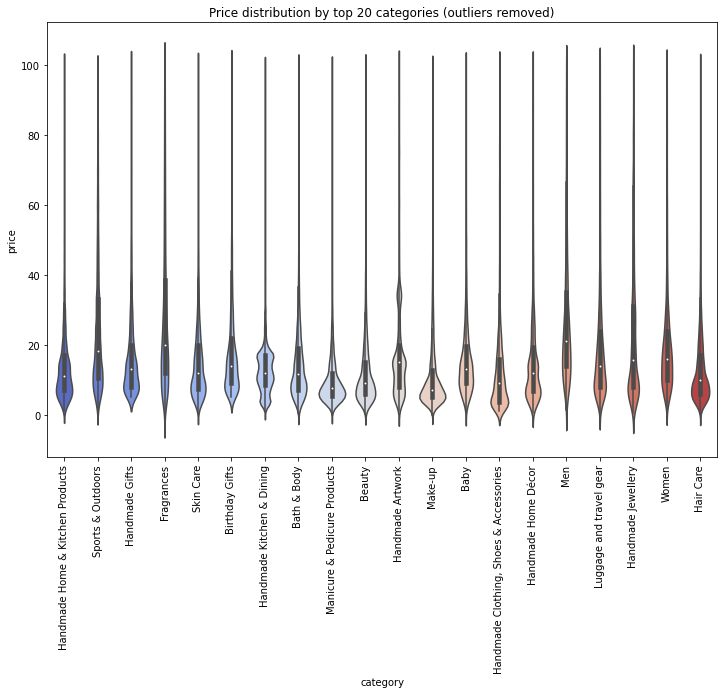

In [63]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_clean_top_20.reset_index(), x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Price distribution by top 20 categories (outliers removed)')
plt.show()

In [73]:
#2. **Bar Charts**:
    #Create a bar chart comparing the average price of products for the top 10 product categories 
    # (based on count).
    #Which product category commands the highest average price? Don't filter here by top categories.
    #the category that commands the highest average price is the sports and outdoors category
#top_20_categories = df['category'].value_counts().head(20).index
df['category'].value_counts().head(10).index
top_10_categories = df['category'].value_counts().head(10).index
top_10_categories
df_top_10 = df[df['category'].isin(top_10_categories)]
average_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)


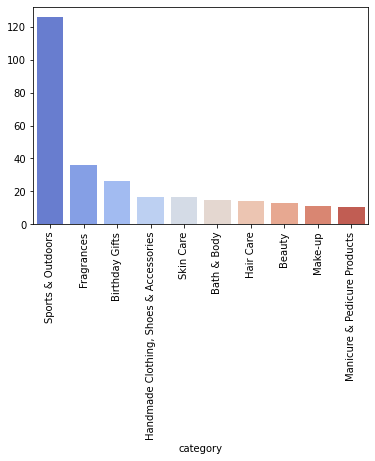

In [76]:
sns.barplot(x=average_prices.index, y=average_prices.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

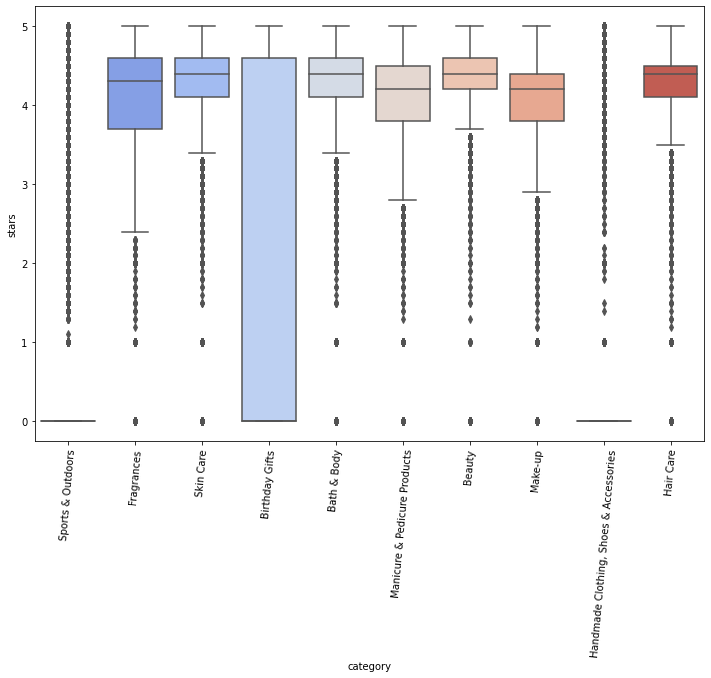

In [81]:

#3. Box Plots:
    # Visualize the distribution of product `ratings` based on their `category`
    #  using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    # Which category tends to receive the highest median rating from customers? Don't filter here by top
    # categories.
    #the category that tends to receive the highest median rating from custoemrs is skincare, bath and beauty
plt.figure(figsize=(12, 8))

df['category'].value_counts().head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]
sns.boxplot(data=df_top_10, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=85)
plt.show()
    


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?


In [82]:
#1. **Correlation Coefficients**:
    # Calculate the correlation coefficient between `price` and `stars`.
    # Is there a significant correlation between product price and its rating?

correlation = df['price'].corr(df['stars'])
correlation
#no significant correlation between stars and price

-0.12490673262148641

<AxesSubplot:xlabel='price', ylabel='stars'>

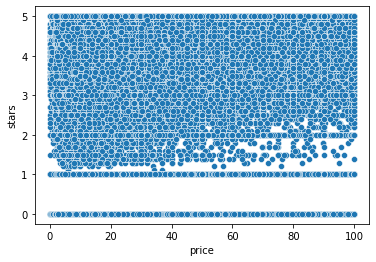

In [89]:
#2. **Visualizations**:
    # Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#from the scatterpolot, it is evident that the average rating increases slightly as the price increases
#sns.scatterplot(data=df, x='price', y='stars')
sns.scatterplot(data=df_clean, x='price', y='stars')


# Use a correlation heatmap to visualize correlations between all numerical variables.


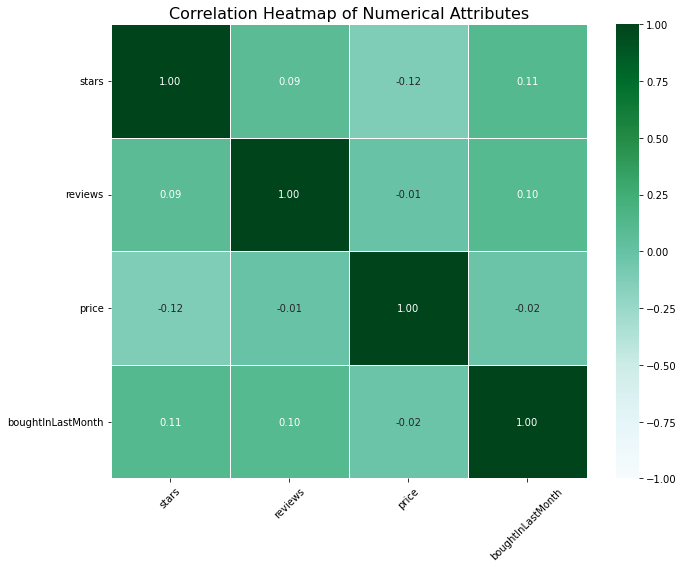

In [92]:
# Use a correlation heatmap to visualize correlations between all numerical variables.

numerical_categories = ['stars', 'reviews', 'price', 'boughtInLastMonth']
df_filtered = df[numerical_categories]
corr_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Numerical Attributes', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

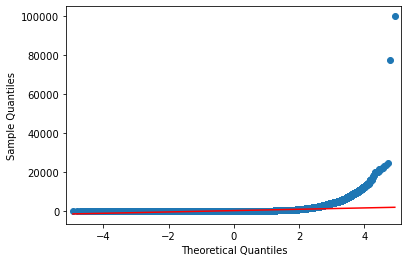

In [94]:
# Examine if product prices typically follow a normal distribution using a QQ plot. 
import statsmodels.api as sm

sm.qqplot(df['price'], line='s');